# Star Wars Survey
**"Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?"**  

*835 survey responses*

In [150]:
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [151]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

### Convert Yes/No columns to Boolean

In [152]:
q_watched_col = "Have you seen any of the 6 films in the Star Wars franchise?"
q_fan_col = "Do you consider yourself to be a fan of the Star Wars film franchise?"

yes_no = {
    "Yes": True,
    "No": False
}

star_wars[q_watched_col] = star_wars[q_watched_col].map(yes_no)
star_wars[q_fan_col] = star_wars[q_fan_col].map(yes_no)

**Handle Multiple Choice questions**

In [153]:
def seen_cols():
    return star_wars.columns[3:9]

movie_eps = ['I', 'II', 'III', 'IV', 'V', 'VI']

seen_name_dict = {}
for idx, seen_col in enumerate(seen_cols()):
    
    # construct new shorter column name
    seen_name_dict[seen_col] = 'seen_' + str(idx + 1)
    
    # cast column values to boolean based on whether 
    # value contains respective Star Wars episode name
    star_wars[seen_col] = star_wars[seen_col].str.contains(movie_eps[idx], na=False)
    
star_wars = star_wars.rename(columns=seen_name_dict)

**check cleaning result**

In [154]:
for col in seen_cols():
    print("{}\n".format(star_wars[col].value_counts(dropna=False)))

True     673
False    513
Name: seen_1, dtype: int64

False    615
True     571
Name: seen_2, dtype: int64

False    636
True     550
Name: seen_3, dtype: int64

True     607
False    579
Name: seen_4, dtype: int64

True     758
False    428
Name: seen_5, dtype: int64

True     738
False    448
Name: seen_6, dtype: int64



### Convert Ranking Columns to Float

In [155]:
def ranking_cols():
    return star_wars.columns[9:15]

star_wars[ranking_cols()] = star_wars[ranking_cols()].astype(float)

In [156]:
ranking_name_dict = {}
for idx, ranking_col in enumerate(ranking_cols()):
    # construct new shorter column name
    ranking_name_dict[ranking_col] = 'ranking_' + str(idx + 1)
     
star_wars = star_wars.rename(columns=ranking_name_dict)

**check cleaning result**

In [157]:
for col in ranking_cols():
    print("{}\n".format(star_wars[col].value_counts(dropna=False).sort_index()))

 1.0    129
 2.0     71
 3.0    130
 4.0    237
 5.0    100
 6.0    168
NaN     351
Name: ranking_1, dtype: int64

 1.0     32
 2.0    116
 3.0    103
 4.0    183
 5.0    300
 6.0    102
NaN     350
Name: ranking_2, dtype: int64

 1.0     36
 2.0     47
 3.0    150
 4.0    182
 5.0    203
 6.0    217
NaN     351
Name: ranking_3, dtype: int64

 1.0    204
 2.0    135
 3.0    127
 4.0    130
 5.0     79
 6.0    161
NaN     350
Name: ranking_4, dtype: int64

 1.0    289
 2.0    235
 3.0    106
 4.0     47
 5.0    118
 6.0     41
NaN     350
Name: ranking_5, dtype: int64

 1.0    146
 2.0    232
 3.0    220
 4.0     57
 5.0     36
 6.0    145
NaN     350
Name: ranking_6, dtype: int64



### top-ranked movie

In [158]:
mean_ranking = star_wars[ranking_cols()].mean()
mean_ranking

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

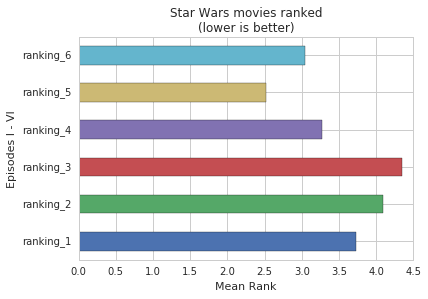

In [159]:
ax = mean_ranking\
    .plot.barh(title='Star Wars movies ranked\n(lower is better)')
    
ax.set_xlabel('Mean Rank')
ax.set_ylabel('Episodes I - VI');

*Episode V* is the movie with the best mean ranking of 2.5<br> *Episode III* has the worst mean ranking of 4.4.

Respondents were most consistent in their ranking of *Episode II and III* and most disagreeing about the ranking of *Episode IV*.

A possible explanation could be derived from the order in which the movies came out.   
Episodes 4-6 came out 20 years before Episodes 1-3.  

The fact that many people would remember the 'old' movies from their childhood could explain the conflicting views about the first 'new' movie (*Episode IV*)  

Furthermore, producing sci-fi movies with many special effects was a much bigger challenge in the late 70s than it was 20 years later. This could explain why none of the 'new' movies on average could beat the rankings of the 'old' movies.

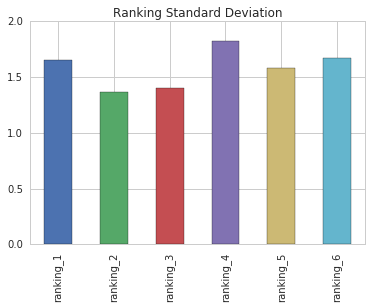

In [160]:
star_wars[ranking_cols()].std()\
    .plot.bar(sharex=True, sharey=True, title='Ranking Standard Deviation');

### most seen movies

In [161]:
sum_seen = star_wars[seen_cols()].sum()
sum_seen.sort_values(ascending=False)

seen_5    758
seen_6    738
seen_1    673
seen_4    607
seen_2    571
seen_3    550
dtype: int64

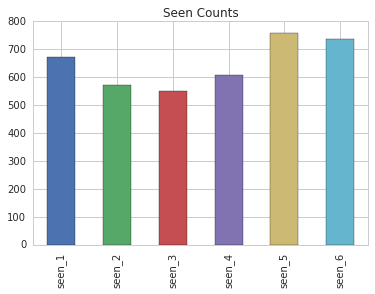

In [162]:
sum_seen.plot.bar(title='Seen Counts');

In [187]:
c_seen = pd.Series(sum_seen.values, name='seen')
c_ranking = pd.Series(mean_ranking.values, name='ranking')

combined = pd.concat([c_seen, c_ranking], axis=1) 
combined.corr()

,seen,ranking
seen,1.000000,-0.878126
ranking,-0.878126,1.000000


The number of times a movie was seen correlates strongly with its ranking.
If fewer people watched the 'new' movies (Episodes 1-3) than the 'old' movies (Episodes 4-6) then a number of people representing this difference would assign better ranks to the movies they have watched. Or, put differently: Rank 1 of 3 weighs less than Rank 1 of 6. This could slightly distort the analysis.  
since 